**교차검증을 이용한 하이퍼 매개변수 최적화**

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import time

In [28]:
# fasion_mnist를 읽고 신경망에 입력할 형태로 변환

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000,784)

x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [29]:
# 신경망 구조 설정

n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_output=10

# 모델을 설계해주는 함수 (모델을 나타내는 객체 model을 반환)

def build_model():
  model=Sequential()
  model.add(Dense(units=n_hidden1,activation='relu',input_shape=(n_input,)))
  model.add(Dense(units=n_hidden2,activation='relu'))
  model.add(Dense(units=n_hidden3,activation='relu'))
  model.add(Dense(units=n_output, activation='softmax'))
  return model

 # 교차 검증을 해주는 함수(서로 다른 옵티마이저(opt)에 대해서)

def cross_validation(opt,x, batch_size, n_epoch, k): #opt에 함수 넣기
  start = time.time()
  accuracy=[]
  for train_index, val_index in KFold(k).split(x_train):
    xtrain, xval = x_train[train_index], x_train[val_index]
    ytrain, yval = y_train[train_index], y_train[val_index]
    dmlp = build_model()
    dmlp.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    dmlp.fit(xtrain, ytrain, batch_size=batch_size, epochs=n_epoch, verbose=0)
    accuracy.append(dmlp.evaluate(xval, yval, verbose=0)[1])
  end = time.time()
  ##print(x,"하이퍼 매개변수 최적화에 걸린 시간은",end-start,"초 입니다.")
  return accuracy, end-start

[ 1 ] batch_size = 256 ,n_epoch = 20 ,k_fold =  3
SGD: 84.482 %,  time: 0 m 47 s
Adam: 89.108 %,  time: 0 m 39 s
Adagrad: 82.362 %,  time: 1 m 17 s
RMSprop: 87.398 %,  time: 0 m 48 s


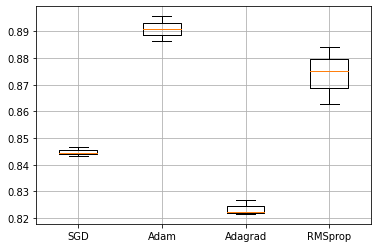

[ 2 ] batch_size = 256 ,n_epoch = 20 ,k_fold =  4
SGD: 85.118 %,  time: 1 m 3 s
Adam: 89.317 %,  time: 0 m 57 s
Adagrad: 82.813 %,  time: 0 m 57 s
RMSprop: 87.778 %,  time: 1 m 21 s


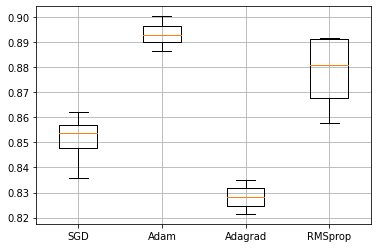

[ 3 ] batch_size = 256 ,n_epoch = 20 ,k_fold =  5
SGD: 85.063 %,  time: 1 m 18 s
Adam: 89.612 %,  time: 1 m 14 s
Adagrad: 83.118 %,  time: 1 m 21 s
RMSprop: 89.078 %,  time: 1 m 33 s


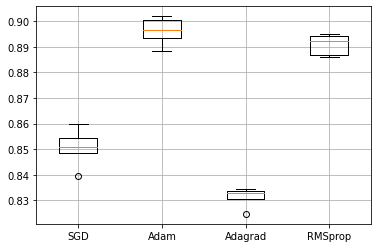

[ 4 ] batch_size = 256 ,n_epoch = 30 ,k_fold =  3
SGD: 85.267 %,  time: 0 m 52 s
Adam: 89.173 %,  time: 0 m 55 s
Adagrad: 83.632 %,  time: 0 m 55 s
RMSprop: 88.708 %,  time: 1 m 9 s


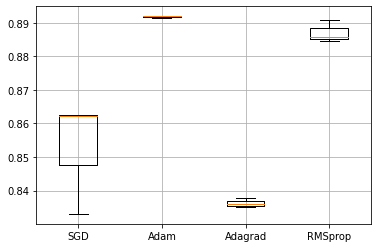

[ 5 ] batch_size = 256 ,n_epoch = 30 ,k_fold =  4
SGD: 86.27 %,  time: 1 m 23 s
Adam: 89.617 %,  time: 1 m 24 s
Adagrad: 84.067 %,  time: 1 m 21 s
RMSprop: 89.04 %,  time: 2 m 17 s


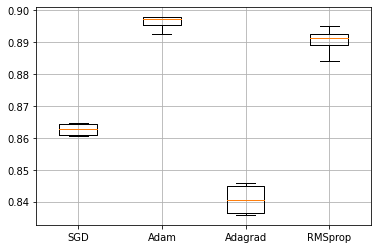

[ 6 ] batch_size = 256 ,n_epoch = 30 ,k_fold =  5
SGD: 86.255 %,  time: 1 m 41 s
Adam: 89.41 %,  time: 1 m 51 s
Adagrad: 84.105 %,  time: 1 m 50 s
RMSprop: 88.533 %,  time: 2 m 31 s


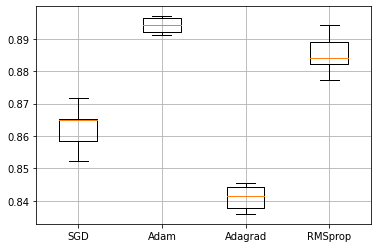

KeyboardInterrupt: ignored

In [30]:
# 하이퍼 매개변수 설정

batch_size=[256, 512]
n_epoch = [20,30,40]
k = [3,4,5] #3겹
iter = 0

for size in batch_size:
  for epoch in n_epoch:
    for fold in k:
      iter += 1
      # 옵티마이저 4개에 대해서 교차 검증을 진행
      acc_sgd = cross_validation(SGD(),"Sgd",size,epoch,fold)
      acc_adam = cross_validation(Adam(),"Adam",size,epoch,fold)
      acc_adagrad = cross_validation(Adagrad(),"Adagrad",size,epoch,fold)
      acc_rmsprop = cross_validation(RMSprop(),"Rmsprop",size,epoch,fold)
      # 4개의 옵티마이저의 정확률, 시간을 비교
      print("[",iter,"] batch_size =",size,",n_epoch =",epoch, ",k_fold = ",fold)
      print("SGD:", round(np.array(acc_sgd[0]).mean()*100,3),"%,  time:",int(acc_sgd[1]//60),"m",round(acc_sgd[1]%60),"s")
      print("Adam:", round(np.array(acc_adam[0]).mean()*100,3), "%,  time:",int(acc_adam[1]//60),"m",round(acc_adam[1]%60),"s")
      print("Adagrad:", round(np.array(acc_adagrad[0]).mean()*100,3), "%,  time:",int(acc_adagrad[1]//60),"m",round(acc_adagrad[1]%60),"s")
      print("RMSprop:", round(np.array(acc_rmsprop[0]).mean()*100,3), "%,  time:",int(acc_rmsprop[1]//60),"m",round(acc_rmsprop[1]%60),"s")
      plt.figure()
      plt.boxplot([acc_sgd[0], acc_adam[0], acc_adagrad[0], acc_rmsprop[0]], labels=["SGD","Adam","Adagrad","RMSprop"])
      plt.grid()
      plt.show()